In [2]:
# !pip install Pandas 
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 17) # 보이게 할 열의 개수

In [5]:
data = pd.read_csv("data/(sentiment_analysis_by_huggingface_model) anal_reprt_title_car(add).csv",encoding = "cp949")
data.shape

(21810, 86)

In [12]:
from copy import copy
df = copy(data)
df['title'].head()

0                     당사 추정치와 비슷했던 3Q 실적
1                민영화 원년 - 증익과 주주친화 확립의 해
2         우리은행 펀더멘털을 보면 PBR 0.4배가 두렵지 않다
3                  4Q16 Review: 높아진 이익체력
4    순이익 증가와 자산건전성 개선으로 업종 내 Discount 해소
Name: title, dtype: object

## Title EDA 
### nan 확인 

In [16]:
df['title'].isnull().values.any() # NaN항목이 하나도 없으면 False 

False

### Title 문자열 길이 확인 

title의 최대 길이:75
title의 최소 길이:2


Text(0, 0.5, 'number of samples')

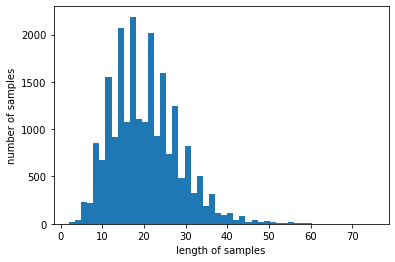

In [19]:
import matplotlib.pyplot as plt

# Title 문자열의 길이 분포 확인 
length_list = df['title'].apply(lambda x: len(x)) 
plt.hist(length_list, bins = 50)  #  bins 파라미터: 히스토그램의 가로축 구간의 개수

print('title의 최대 길이:{}'.format(max(length_list)))
print('title의 최소 길이:{}'.format(min(length_list)))

plt.xlabel('length of samples')
plt.ylabel('number of samples')

In [38]:
# title 양쪽 공백 문자열 삭제 
df['title'] = df['title'].str.strip()

# 1 <= 문자열의 길이 <= 5 
condition1 = (1 <= df['title'].str.len()) & ( df['title'].str.len() <=5)
df_shortTitle_1_5 = df['title'].loc[ condition1 , ] 
df_shortTitle_1_5

# title에 단어가 1개만 있는 경우 
df_word1 = df.loc[~ df['title'].str.contains(" "), ] # title에 공백이 없는 경우 = df_word1 --> 공백이 없으면 = 단어가 1개 

# 단어가 1개인 title 제외시킨 데이터셋 내보내기    
df=df.drop(df_word1.index , axis='index') 
df.to_csv("Result of data cleansing/(sentiment_analysis_by_huggingface_model) anal_reprt_title_car(add)_remove 1Word.csv", index = False ,encoding = "cp949")

In [34]:
# title에 단어가 1개만 있는 data 확인 
# pd.set_option('display.max_columns', 17)
# df_word1['title']
# df_word1['title'].to_csv("checklist data for data cleansing/title에 단어가 하나만 있는 경우.csv", index = False ,encoding = "cp949")

In [ ]:
# 